---
title: 'How to have smooth animations in Jupyter Notebook and Matplotlib'
date: 2019-01-16
permalink: /posts/2019/01/how-to-have-smooth-animations-in-jupyter-notebook-and-matplotlib/
tags:
  - Jupyter Notebook
  - Python
  - Matplotlib
---


Jupyter Notebook is a godsend. Compared to other methods to share a slightly incoherent mix of code and ideas it is certainly the best way to do so. It is what I currently use to share my progress with my supervisors because it is just so *convenient*. Just send them a link and they can read your thoughts and how that translates to code, with the results of that intermingled. It may even be Second Coming of [Literate Programming](https://en.wikipedia.org/wiki/Literate_programming).

But there was one issue I ran into. I currently have cine MRI data (2D slices in time) which I wanted to view sequentially through time. *Should be easy*, I thought, *just* `imshow` *every image in a loop*. But this does not work. It either just does not show anything at all or it you get annoying blanks in between draws, distracting you from what actually happens. And StackOverflow is [riddled](https://stackoverflow.com/questions/34486642/what-is-the-currently-correct-way-to-dynamically-update-plots-in-jupyter-ipython) [with](https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook) [questions](https://stackoverflow.com/questions/21360361/how-to-dynamically-update-a-plot-in-a-loop-in-ipython-notebook-within-one-cell) and [YMMV](https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook/39853938).
And for me, it varied. As in, all options did not work. Either they had the problems as I described before, or they opend so many figures it crashed my browser. 

But in the end I found a solution that works, but for the life of me I cannot find anymore. I hope someone can inform me where I can find it again so I can give some proper credit. In lieu of that, I will share my solution here. Partly for preservation of knowledge for myself in case I run into this problem again in the future, or so someone won't have the same problem.

Inspect the data
------
So let's take a look at the data first (Image probably from the [CuteLittleAnimalGIFs Tumblr](http://littleanimalgifs.tumblr.com/post/25683807773/scratch-scratch), at least that is an source from 2012 I could find). 

<IPython.core.display.Javascript object>


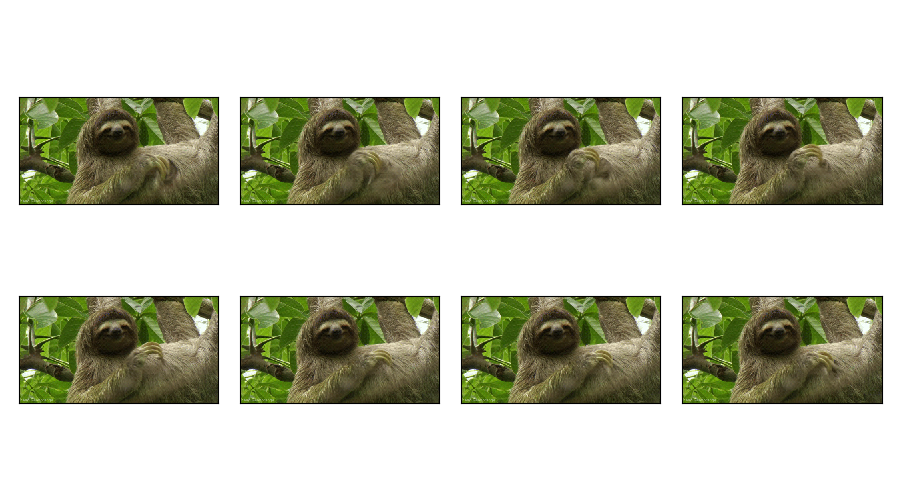

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

images = sorted(glob('../images/2019-01-16-how-to-have-smooth-animations-in-jupyter-notebook-and-matplotlib/frame*.jpg'))

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 5))
for i in range(nrows):
    for j in range(ncols):
        with Image.open(images[ncols * i + j]) as img:
            ax[i,j].imshow(img)
            ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
plt.tight_layout()
plt.show()        


Look at that cute coconut! Most important for our purposes here is the `%matplotlib notebook` magic. It is essential for having smooth animations. So let's animate him.

<IPython.core.display.Javascript object>


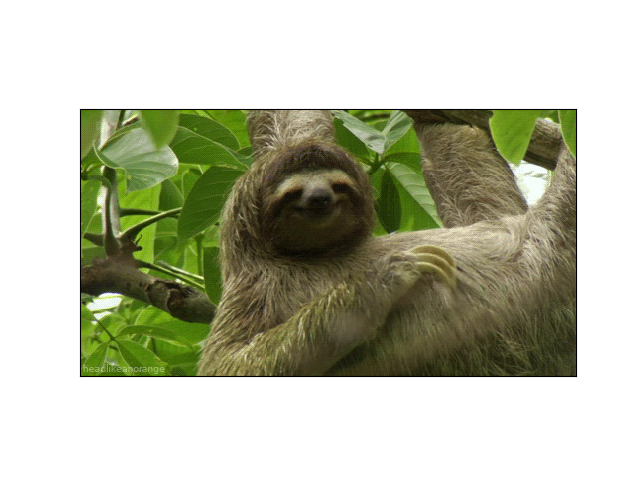

In [ ]:
# Enable interactive mode
plt.ion()
# Create a plot
fig, ax = plt.subplots(1,1)
while True:
    for i in range(len(images)):
        with Image.open(images[i]) as img:
            # Clear the current plot
            ax.clear()
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Display new data
            ax.imshow(img)
            
            # Possibly do other stuff here for other subplots
            # ... 
            
            # Draw the figure
            fig.canvas.draw()
            
# Leave interactive mode after you are done
plt.ioff()

Now he is scratching happily! And without hiccups, blanks or other drawing artifacts. And you can do this for multiple subplots by just repeating all your operations for every subplot. They will draw at the same time because interactive mode is enabled and won't draw until you give the command with `fig.canvas.draw()`.

So In summary, you get smooth, dynamically updated plots with matplotlib and Jupyter Notebook with the following recipe:


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()
fig, subplots = make_subplots()
for image in sequence:
    subplot = get_relevant_subplot(subplots)
    subplot.clear()
    subplot.imshow(image)
    fig.canvas.draw()
    
plt.ioff()

And you can do this for multiple images from multiple sequences at the same time.